# Monte Carlo Molecuar Simulation

MC molecular simulation basically uses the idea of Markov Chain Monte Carlo to generate samples from Boltzmann distribution. Boltzmann distribuion has the following property:
$$  \mathbf{x}\in\mathcal{R}^f, \text {  Probabiltity density   } p(\mathbf{x})\propto e^{-\beta E(\mathbf{x})} $$
where the degrees of freedom of the system are large, typically $f \sim 10000$. Generating samples of $\mathbf{x}$ is very difficult, since most values of $\mathbf{x}$ are NOT feasible (i.e. $p(\mathbf{x}) \simeq 0$). 

If a sample is generated, then properties of the system are calcualted by computing integrals of type:
$$ \langle A \rangle = \frac{\int~d\mathbf{x}~A(\mathbf{x}) p(\mathbf{x})}{\int~d\mathbf{x}~p(\mathbf{x})}
$$

One very popular idea is to use Markov Process, elaborated now. Given $\mathbf{x}$, generate new point $\mathbf{y}$ that is *close* to $\mathbf{x}$ by a random pertubation. Since new point depends only on the current point **and** does not depend on prior history, this process (of generating new point) is called a Markov Process. 

Now, to ensure that the `randomly` generated $\mathbf{y}$ is from probability distribution $p(\mathbf{x})$, an additional condition called **detailed balance condition** is used:
$$ p(\mathbf{x})~t(\mathbf{x}\rightarrow \mathbf{y}) = p(\mathbf{y})~t(\mathbf{y} \rightarrow \mathbf{x})
$$
where $t$ is the transition probability. The transition probability in turn can be split into suggestion probability $s(\bf{y}|\bf{x})$ and the acceptace probability $a(\bf{x}\rightarrow \bf{y})$; i.e $t(\mathbf{x}\rightarrow \mathbf{y}) = s(\mathbf{y} | \mathbf{x}) ~ a(\mathbf{x} \rightarrow \mathbf{y})$. Typically, $s( \mathbf{y} | \mathbf{x} ) = s(\mathbf{x}|\mathbf{y})$. The detailed balance condition can be rewitten to find the ratio of acceptance probabilities. 

Metropolis suggested that from the ratio of acceptence probabilities, the acceptance probabilitity can be written as: 
$$ a( \mathbf{x} \rightarrow \mathbf{y}) = min \left( 1, \frac{p(\mathbf{y})}{p(\mathbf{x})} \right)
$$
Note that Metropolis' acceptance criterion is only one of the many possible sultions for $a(\bf{x}\rightarrow \bf{y})$

Also note that when the simulation is for an equilibrium ensemble with $p(\mathbf x) \propto \exp(-\beta E(\mathbf x) )$, then the Metropolis acceptance criteria becomes: 
\begin{equation}
a(\mathbf x \rightarrow \mathbf y) = min\left( 1 e^{-\beta (E(\mathbf y) - E(\mathbf x))}\right) = \begin{cases} 1, &\textrm{ if } E(\mathbf y)-E(\mathbf x) \le 0, \\ e^{-\beta ( E(\mathbf y)-E(\mathbf x))}, &otherwise \end{cases}
\end{equation}

# Write the following functions to do Markov Chain Monte Carlo (MCMC)

We will be considering the Argon system, as before. Write the following functions for performing MCMC
- `totalPotentialEnergy`, `pairwise_LJ_energy(i,j)`
- `MCMC_Translate` to implement the following: `selectParticleRandom`, `randomDisplacement_of_randomlySelectedParticle(i,max_dist)`,  `MetropolisAcceptanceCriterion()`


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

values to be taken 
epsilon=1
sigma = 1
particles = 100
area= 100
kt = 1

In [3]:
epsilon =1
sigma = 1
kT=1
numParticles = 20
dim = 3
boxL = 100.0
boxL3D = 2
radius=0.1

In [4]:
# generate a random initial configuration
def initialize_positions(numParticles, dim, boxL):
    positions = np.random.random_sample( (numParticles, dim)) * boxL
    return positions

positions=initialize_positions(numParticles, dim, boxL3D)
positionsPBC=initialize_positions(5, 1, 2)
positions2D=initialize_positions(50, 2, 2)
# print(positionsPBC)
print(np.shape(positions))


(20, 3)


In [5]:
def pairwise_LJ_Energy(sigma, epsilon, particle,interaction, positions, boxL):
    dimensions=np.shape(positions)[1]
    r=0
    energy=0
    for dim in range(dimensions):

        ## Boundary Conditions Implemented
        positions[particle][dim]%= boxL
        positions[interaction][dim]%= boxL
        r+=(min(abs(positions[particle][dim]-positions[interaction][dim]), boxL-abs(positions[particle][dim]-positions[interaction][dim])))**2
        # print(math.sqrt(r))
    energy+=4*epsilon*(((sigma**12)/(r**6)) - ((sigma**6)/(r**3)))
    # print(energy)
    return energy

def totalPotentialEnergy(sigma, epsilon, positions, boxL):
    totPE = 0.0
    dimensions=np.shape(positions[1])
    numParticles=np.shape(positions)[0]

    for particle in range(numParticles):
        for interaction in range(particle+1, numParticles):
            totPE += 2*pairwise_LJ_Energy(sigma, epsilon, particle,interaction, positions, boxL)
    
    return totPE

U1=totalPotentialEnergy(sigma, epsilon, positions, boxL)
print(U1)

327055786.737268


In [6]:
pairwise_LJ_Energy(1, 1, 0, 3, positionsPBC, 2)
# checking if periodic boundary conditions are working

12080146.46492279

monte carlo probability 
$1 if E(y)<E(x)$
$e^{-\rho (E(y)-E(x))}$

average acceptance probability you want around 0.3 to 0.4

In [7]:
def MCMC_Translate(positions):

    numParticles=np.shape(positions)[0]
    dimensions=np.shape(positions)[1]
    newPositions=matrix.copy(positions)

    # select a particle randomly

    choices=[]
    for _ in range(dimensions):
        choices.append(np.random.randint(0, numParticles-1))
    
    # print(choices)
    

    # perform random perturbation of the selected particle (we have used a gaussian distribution)
    
    for _ in range(dimensions):
        # print(positions[choices[_]][_])
        newPositions[choices[_]][_]*=np.random.normal(loc=1, scale=0.1)
    # print(newPositions-positions)

        # print(positions[choices[_]][_])

    # compute U_{after} - U_{before}, and acceptance probabilty
    U1=totalPotentialEnergy(sigma, epsilon, positions, boxL)
    U2=totalPotentialEnergy(sigma, epsilon, newPositions, boxL)
    # print(U2)
    delta=U2-U1
    # print(delta)

    # accept or reject?  i.e. set accept=1 or 0 accordingly
    if delta < 0:
        acceptProb=1
    else:
        acceptProb=0
        
    # print(acceptProb)

    # if reject, undo the move, to get back to 'before' configuration
    if (acceptProb):
        # print("1")
        # print(newPositions-positions)
        return newPositions
    else:
        # print("0")
        return positions
    # return accept

MCMC_Translate(positions)


NameError: name 'matrix' is not defined

In [ ]:
# generate chain of configurations
def MonteCarloSimulation(initial_config, numSteps):
    states=[]
    systemState=matrix.copy(initial_config)
    for stepNumber in range(numSteps):
        states.append(MCMC_Translate(systemState))
    return states

# MonteCarloSimulation(positions, 10)

# np.shape(MonteCarloSimulation(positions2D, 10))
MonteCarloSimulation(positions, 10)

[array([[0.41074593, 0.36362483, 0.46144143],
        [1.24522824, 0.62711964, 0.48574046],
        [1.0333914 , 1.20444478, 0.26785785],
        [1.23530826, 0.38527503, 0.70459853],
        [0.99714486, 0.7895339 , 1.43464921],
        [0.99478172, 1.00612956, 1.19358744],
        [0.85478993, 1.45514784, 1.33126622],
        [1.06074441, 1.45480998, 1.73711553],
        [0.95532532, 0.29620869, 1.9050474 ],
        [1.97267263, 1.39931787, 0.81734723],
        [0.05640258, 1.03613108, 0.8833694 ],
        [0.54282299, 0.88556389, 0.8318638 ],
        [1.2483047 , 1.72085279, 0.26844704],
        [0.12825758, 0.71475645, 0.30870264],
        [0.87911706, 1.07226409, 0.44308793],
        [1.66023569, 0.02328049, 0.99392974],
        [1.80388812, 1.26213121, 1.2881891 ],
        [0.36102871, 1.6631703 , 0.81803161],
        [1.52901443, 0.99905231, 0.98972551],
        [0.39499523, 1.70025241, 0.6244852 ],
        [1.18539121, 1.98451397, 0.19150697],
        [1.33402607, 1.23304753, 1

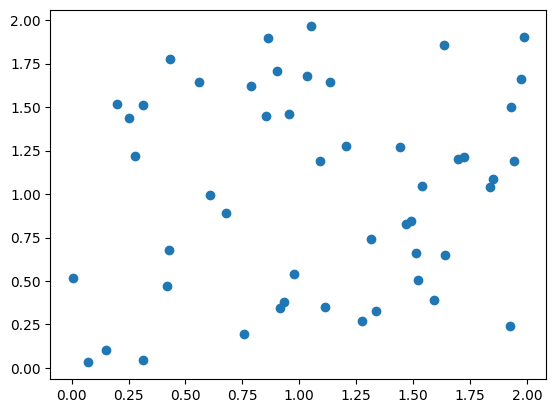

In [ ]:
def Plot_XY(config):
    numParticles=np.shape(config)[0]
    X=[]
    Y=[]
    for _ in range(numParticles):
        X.append(config[_][0])
        Y.append(config[_][1])

    # print(x)
    # print(y)
    plt.scatter(X, Y)
    plt.show()


Plot_XY(positions2D)

In [ ]:
def Plot_3D(config):
    numParticles=np.shape(config)[0]
    ax = plt.axes(projection ="3d") 

    for particle in range(numParticles):
        ax.scatter3D(config[particle][0], config[particle][1], config[particle][2])
    plt.show()

# print(positions)

def MonteCarloPlotting(config, numSteps):
    systemState=np.matrix.copy(config)
    for _ in range(numSteps):
        systemState=MCMC_Translate(systemState)
        if _ % 5 == 0:
            Plot_3D(systemState)

Plot_3D(positions)
MonteCarloPlotting(positions, 100)

NameError: name 'positions' is not defined

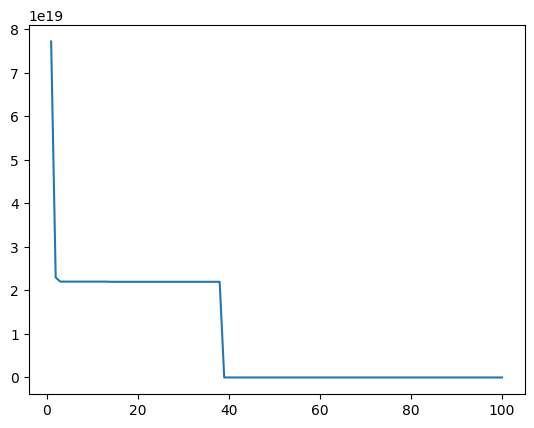

In [ ]:
def PEvsT(config, numSteps):
    t=[]
    PE_values=[]
    systemState=np.matrix.copy(config)
    for _ in range(numSteps):
        t.append(_+1)
        systemState=MCMC_Translate(systemState)
        PE_values.append(totalPotentialEnergy(sigma, epsilon, systemState, boxL3D))
    plt.plot(t, PE_values)

PEvsT(positions2D, 1000)